# Business Understanding

# Data Understanding

In [70]:
import pandas as pd
import numpy as np
import csv
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
df=pd.read_csv('Data/AviationData.csv', encoding='latin-1')

C:\Users\hrcoh\AppData\Local\Temp\ipykernel_19580\2555783615.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('Data/AviationData.csv', encoding='latin-1')


In [6]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [7]:
#Explore data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [8]:
#Explore summary statistics
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [9]:
#Looking at unique values in the columns that I don't fully understand
print(df['Amateur.Built'].unique(),'\n')
print(df['FAR.Description'].unique(),'\n')
print(df['Schedule'].unique(),'\n')
print(df['Report.Status'].unique(),'\n')
print(df['Registration.Number'].unique(),'\n')
print(df['Aircraft.damage'].unique(),'\n')
print(df['Engine.Type'].unique(),'\n')
print(df['Aircraft.Category'].unique())

['No' 'Yes' nan] 

[nan 'Part 129: Foreign' 'Part 91: General Aviation'
 'Part 135: Air Taxi & Commuter' 'Part 125: 20+ Pax,6000+ lbs'
 'Part 121: Air Carrier' 'Part 137: Agricultural'
 'Part 133: Rotorcraft Ext. Load' 'Unknown' 'Part 91F: Special Flt Ops.'
 'Non-U.S., Non-Commercial' 'Public Aircraft' 'Non-U.S., Commercial'
 'Public Use' 'Armed Forces' 'Part 91 Subpart K: Fractional' '091' 'NUSC'
 '135' 'NUSN' '121' '137' '129' '133' '091K' 'UNK' 'PUBU' 'ARMF' '103'
 '125' '437' '107'] 

[nan 'SCHD' 'NSCH' 'UNK'] 

['Probable Cause' 'Factual' 'Foreign' ...
 'The pilot did not ensure adequate clearance from construction vehicles during taxi.'
 'The pilot\x92s failure to secure the magneto switch before attempting to hand rotate the engine which resulted in an inadvertent engine start, a runaway airplane, and subsequent impact with parked airplanes. Contributing to the accident was the failure to properly secure the airplane with chocks.'
 'The pilot\x92s loss of control due to a wind g

For our analysis, we can drop FAR Description, Schedule, and Registration Number. Report Status. Amateur Built, Aircraft Category, Engine Type and Aircraft Damage may be helpful.

In [10]:
#Understanding differences bewteen injury columns
print(df['Injury.Severity'].unique(),'\n')
print(df['Total.Fatal.Injuries'].unique(),'\n')
print(df['Total.Serious.Injuries'].unique(),'\n')
print(df['Total.Minor.Injuries'].unique(),'\n')
print(df['Total.Uninjured'].unique())

['Fatal(2)' 'Fatal(4)' 'Fatal(3)' 'Fatal(1)' 'Non-Fatal' 'Incident'
 'Fatal(8)' 'Fatal(78)' 'Fatal(7)' 'Fatal(6)' 'Fatal(5)' 'Fatal(153)'
 'Fatal(12)' 'Fatal(14)' 'Fatal(23)' 'Fatal(10)' 'Fatal(11)' 'Fatal(9)'
 'Fatal(17)' 'Fatal(13)' 'Fatal(29)' 'Fatal(70)' 'Unavailable'
 'Fatal(135)' 'Fatal(31)' 'Fatal(256)' 'Fatal(25)' 'Fatal(82)'
 'Fatal(156)' 'Fatal(28)' 'Fatal(18)' 'Fatal(43)' 'Fatal(15)' 'Fatal(270)'
 'Fatal(144)' 'Fatal(174)' 'Fatal(111)' 'Fatal(131)' 'Fatal(20)'
 'Fatal(73)' 'Fatal(27)' 'Fatal(34)' 'Fatal(87)' 'Fatal(30)' 'Fatal(16)'
 'Fatal(47)' 'Fatal(56)' 'Fatal(37)' 'Fatal(132)' 'Fatal(68)' 'Fatal(54)'
 'Fatal(52)' 'Fatal(65)' 'Fatal(72)' 'Fatal(160)' 'Fatal(189)'
 'Fatal(123)' 'Fatal(33)' 'Fatal(110)' 'Fatal(230)' 'Fatal(97)'
 'Fatal(349)' 'Fatal(125)' 'Fatal(35)' 'Fatal(228)' 'Fatal(75)'
 'Fatal(104)' 'Fatal(229)' 'Fatal(80)' 'Fatal(217)' 'Fatal(169)'
 'Fatal(88)' 'Fatal(19)' 'Fatal(60)' 'Fatal(113)' 'Fatal(143)' 'Fatal(83)'
 'Fatal(24)' 'Fatal(44)' 'Fatal(64)' 'Fatal(92

### Data Understanding Summary

There are 31 columns and 88889 rows.

These are some areas we'll consider cleaning or analyzing:

Injury Severity gives us similar information to Total Fatal Injuries, Serious Injuries, Minor Injuries, and Uninjured. We may consider splitting Injury Severity so it just has the word classification and the number of injuries will be kept in the other columns.

Unknown: There are values included in some columns like 'Unknown, UNK, and Unavailable that are the same thing as Nan. We will note this for later.

Ensure data types are correct for each column.

Ensure there are no duplicates and that value formatting is standardized.

Drop columns that do not give us relevant information.

## Data Preparation

In [11]:
df_copy = df.copy()

In [12]:
#Change date column to datetime data type
df['Event.Date']=pd.to_datetime(df['Event.Date'], format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Investigation.Type      88889 non-null  object        
 2   Accident.Number         88889 non-null  object        
 3   Event.Date              88889 non-null  datetime64[ns]
 4   Location                88837 non-null  object        
 5   Country                 88663 non-null  object        
 6   Latitude                34382 non-null  object        
 7   Longitude               34373 non-null  object        
 8   Airport.Code            50132 non-null  object        
 9   Airport.Name            52704 non-null  object        
 10  Injury.Severity         87889 non-null  object        
 11  Aircraft.damage         85695 non-null  object        
 12  Aircraft.Category       32287 non-null  object

In [13]:
#Check for duplicates
df.duplicated().any()

False

In [14]:
#Checking for Missing Data or Nulls
df.isna().any()

Event.Id                  False
Investigation.Type        False
Accident.Number           False
Event.Date                False
Location                   True
Country                    True
Latitude                   True
Longitude                  True
Airport.Code               True
Airport.Name               True
Injury.Severity            True
Aircraft.damage            True
Aircraft.Category          True
Registration.Number        True
Make                       True
Model                      True
Amateur.Built              True
Number.of.Engines          True
Engine.Type                True
FAR.Description            True
Schedule                   True
Purpose.of.flight          True
Air.carrier                True
Total.Fatal.Injuries       True
Total.Serious.Injuries     True
Total.Minor.Injuries       True
Total.Uninjured            True
Weather.Condition          True
Broad.phase.of.flight      True
Report.Status              True
Publication.Date           True
dtype: b

In [15]:
#Checking how many nulls in each column
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [16]:
#Checking what percentage of each column is null
df.isnull().sum()/df.shape[0]*100

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.058500
Country                    0.254250
Latitude                  61.320298
Longitude                 61.330423
Airport.Code              43.601570
Airport.Name              40.708074
Injury.Severity            1.124999
Aircraft.damage            3.593246
Aircraft.Category         63.677170
Registration.Number        1.554748
Make                       0.070875
Model                      0.103500
Amateur.Built              0.114750
Number.of.Engines          6.844491
Engine.Type                7.982990
FAR.Description           63.974170
Schedule                  85.845268
Purpose.of.flight          6.965991
Air.carrier               81.271023
Total.Fatal.Injuries      12.826109
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Uninjured            6.650992
Weather.Condition          5

Let's drop all columns with over 30% null or missing data. Here are the columns that have too many nulls values or are irrelevant to the current business question: Latitude, Longitude, Airport Code, Airport Name, Registration Number, FAR Description, Schedule, Air Carrier, and Publication Date.

In [17]:
#Drop columns with too many missing values or irrevlant to our business question
dropped_columns=['Schedule', 'Air.carrier', 'Longitude','Latitude','Registration.Number','Purpose.of.flight','Publication.Date', 'Airport.Code','Airport.Name', 'FAR.Description']
df=df.drop(dropped_columns, axis=1)

In [18]:
#confirming the columns were dropped
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status'],
      dtype='object')

In [19]:
#Drop some rows with missing data
df=df.dropna(subset=['Make','Model','Amateur.Built'])
print(df.isnull().sum()/df.shape[0]*100)

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.054128
Country                    0.253727
Injury.Severity            1.103994
Aircraft.damage            3.556688
Aircraft.Category         63.659532
Make                       0.000000
Model                      0.000000
Amateur.Built              0.000000
Number.of.Engines          6.702903
Engine.Type                7.833961
Total.Fatal.Injuries      12.765286
Total.Serious.Injuries    13.984303
Total.Minor.Injuries      13.330251
Total.Uninjured            6.572092
Weather.Condition          4.940346
Broad.phase.of.flight     30.461896
Report.Status              7.147207
dtype: float64


In [20]:
#impute continuous variables with the median
df['Number.of.Engines']=df['Number.of.Engines'].fillna(df['Number.of.Engines'].median())
df['Number.of.Engines']=df['Number.of.Engines'].fillna(df['Number.of.Engines'].median())
df.isnull().sum()/df.shape[0]*100

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.054128
Country                    0.253727
Injury.Severity            1.103994
Aircraft.damage            3.556688
Aircraft.Category         63.659532
Make                       0.000000
Model                      0.000000
Amateur.Built              0.000000
Number.of.Engines          0.000000
Engine.Type                7.833961
Total.Fatal.Injuries      12.765286
Total.Serious.Injuries    13.984303
Total.Minor.Injuries      13.330251
Total.Uninjured            6.572092
Weather.Condition          4.940346
Broad.phase.of.flight     30.461896
Report.Status              7.147207
dtype: float64

In [21]:
#Clean Injury Severity Column so it does not include the paranthesis since the exact number of injuries is included in the other columns.
df['Injury.Severity']=df['Injury.Severity'].str.split('(').str[0]
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,...,Amateur.Built,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal,Destroyed,NaN,Stinson,...,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal,Destroyed,NaN,Piper,...,No,1.0,Reciprocating,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal,Destroyed,NaN,Cessna,...,No,1.0,Reciprocating,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal,Destroyed,NaN,Rockwell,...,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal,Destroyed,NaN,Cessna,...,No,1.0,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause


In [22]:
#Change Unknown, UNK, and Unavailable to Nan.
df.replace(['Unknown','UNK','Unavailable'],np.nan, inplace=True)

In [23]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status'],
      dtype='object')

In [24]:
#Change column names
rename_columns= {'Event.Id':'ID', 'Investigation.Type':'Type', 'Accident.Number':'Accident_Number', 'Event.Date':'Date',
    'Injury.Severity':'Injury_Severity', 'Aircraft.Category':'Category','Aircraft.damage':'Damage','Amateur.Built':'Amateur_Built',
       'Number.of.Engines':'Engines', 'Engine.Type':'Engine_Type',
     'Total.Fatal.Injuries':'Fatal_Injuries', 'Total.Serious.Injuries':'Serious_Injuries',
       'Total.Minor.Injuries':'Minor_Injuries', 'Total.Uninjured':'Uninjured', 'Weather.Condition':'Weather',
       'Broad.phase.of.flight':'Flight_Phase', 'Report.Status':'Report_Status'}
df=df.rename(columns=rename_columns)

In [25]:
df.isnull().sum()/df.shape[0]*100

ID                   0.000000
Type                 0.000000
Accident_Number      0.000000
Date                 0.000000
Location             0.055256
Country              0.257110
Injury_Severity      1.199847
Damage               3.690882
Category            63.677575
Make                 0.022554
Model                0.003383
Amateur_Built        0.000000
Engines              0.000000
Engine_Type         10.143440
Fatal_Injuries      12.765286
Serious_Injuries    13.984303
Minor_Injuries      13.330251
Uninjured            6.572092
Weather              5.903381
Flight_Phase        31.079862
Report_Status        7.147207
dtype: float64

Now we'll clean the Country and Location columns. 

In [26]:
#Checking what percentage of values are in each country
df['Country'].value_counts()/(len(df['Country']))

Country
United States                       0.926690
Brazil                              0.004161
Mexico                              0.004026
Canada                              0.003992
United Kingdom                      0.003778
                                      ...   
Palau                               0.000011
Bosnia and Herzegovina              0.000011
Libya                               0.000011
Saint Vincent and the Grenadines    0.000011
Turks and Caicos Islands            0.000011
Name: count, Length: 217, dtype: float64

Almost 93% of these reported accidents occurred in the United States so we will focus our analysis on accidents in the USA. We will drop rows with accidents outside the USA mainland.   

In [27]:
df.drop(df[df.Country != 'United States'].index, inplace=True)

In [28]:
df['Country'].value_counts()

Country
United States    82177
Name: count, dtype: int64

In [29]:
#Split location into into city and state
df['City']=df['Location'].str.split(',').str[0]
df['State']=df['Location'].str.split(',').str[-1]

In [30]:
#Drop Location column
df=df.drop('Location',axis=1)
df.head()

,ID,Type,Accident_Number,Date,Country,Injury_Severity,Damage,Category,Make,Model,...,Engine_Type,Fatal_Injuries,Serious_Injuries,Minor_Injuries,Uninjured,Weather,Flight_Phase,Report_Status,City,State
0,20001218X45444,Accident,SEA87LA080,1948-10-24,United States,Fatal,Destroyed,NaN,Stinson,108-3,...,Reciprocating,2.0,0.0,0.0,0.0,NaN,Cruise,Probable Cause,MOOSE CREEK,ID
1,20001218X45447,Accident,LAX94LA336,1962-07-19,United States,Fatal,Destroyed,NaN,Piper,PA24-180,...,Reciprocating,4.0,0.0,0.0,0.0,NaN,NaN,Probable Cause,BRIDGEPORT,CA
2,20061025X01555,Accident,NYC07LA005,1974-08-30,United States,Fatal,Destroyed,NaN,Cessna,172M,...,Reciprocating,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,Saltville,VA
3,20001218X45448,Accident,LAX96LA321,1977-06-19,United States,Fatal,Destroyed,NaN,Rockwell,112,...,Reciprocating,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,EUREKA,CA
4,20041105X01764,Accident,CHI79FA064,1979-08-02,United States,Fatal,Destroyed,NaN,Cessna,501,...,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,Canton,OH


In [31]:
#Standardize data from all caps
df['Make']=df['Make'].str.title()
df['City']=df['City'].str.title()
df.head()

,ID,Type,Accident_Number,Date,Country,Injury_Severity,Damage,Category,Make,Model,...,Engine_Type,Fatal_Injuries,Serious_Injuries,Minor_Injuries,Uninjured,Weather,Flight_Phase,Report_Status,City,State
0,20001218X45444,Accident,SEA87LA080,1948-10-24,United States,Fatal,Destroyed,NaN,Stinson,108-3,...,Reciprocating,2.0,0.0,0.0,0.0,NaN,Cruise,Probable Cause,Moose Creek,ID
1,20001218X45447,Accident,LAX94LA336,1962-07-19,United States,Fatal,Destroyed,NaN,Piper,PA24-180,...,Reciprocating,4.0,0.0,0.0,0.0,NaN,NaN,Probable Cause,Bridgeport,CA
2,20061025X01555,Accident,NYC07LA005,1974-08-30,United States,Fatal,Destroyed,NaN,Cessna,172M,...,Reciprocating,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,Saltville,VA
3,20001218X45448,Accident,LAX96LA321,1977-06-19,United States,Fatal,Destroyed,NaN,Rockwell,112,...,Reciprocating,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,Eureka,CA
4,20041105X01764,Accident,CHI79FA064,1979-08-02,United States,Fatal,Destroyed,NaN,Cessna,501,...,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,Canton,OH


In [32]:
#Replace continuous variables with the median
continuous_variables=['Engines','Fatal_Injuries','Serious_Injuries','Minor_Injuries','Uninjured']
df[continuous_variables]=df[continuous_variables].fillna(df[continuous_variables].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82177 entries, 0 to 88888
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                82177 non-null  object        
 1   Type              82177 non-null  object        
 2   Accident_Number   82177 non-null  object        
 3   Date              82177 non-null  datetime64[ns]
 4   Country           82177 non-null  object        
 5   Injury_Severity   82060 non-null  object        
 6   Damage            80159 non-null  object        
 7   Category          28118 non-null  object        
 8   Make              82157 non-null  object        
 9   Model             82174 non-null  object        
 10  Amateur_Built     82177 non-null  object        
 11  Engines           82177 non-null  float64       
 12  Engine_Type       77767 non-null  object        
 13  Fatal_Injuries    82177 non-null  float64       
 14  Serious_Injuries  82177 non

In [33]:
# Clean 'Make' Column. Remove spaces.
df['Make'].str.strip()
df['Make'].duplicated().value_counts()

Make
True     74785
False     7392
Name: count, dtype: int64

Why are some values showing up multiple times? For example Piper and Cessena.

In [34]:
#seperate models from aircraft type
df['Model'].value_counts()

Model
152                2323
172                1637
172N               1136
PA-28-140           909
150                 790
                   ... 
THORP T18CWS          1
AVRO 146-RJ70A        1
ULTRA SPORT 254       1
A-300B4-605R          1
PA42                  1
Name: count, Length: 11432, dtype: int64

In [35]:
df.Make.value_counts()

Make
Cessna           25846
Piper            14164
Beech             5058
Bell              2285
Boeing            1483
                 ...  
Spagnoletti          1
Reichert             1
Wild Goose           1
Valenza              1
Royse Ralph L        1
Name: count, Length: 7391, dtype: int64

In [36]:
df.head()

,ID,Type,Accident_Number,Date,Country,Injury_Severity,Damage,Category,Make,Model,...,Engine_Type,Fatal_Injuries,Serious_Injuries,Minor_Injuries,Uninjured,Weather,Flight_Phase,Report_Status,City,State
0,20001218X45444,Accident,SEA87LA080,1948-10-24,United States,Fatal,Destroyed,NaN,Stinson,108-3,...,Reciprocating,2.0,0.0,0.0,0.0,NaN,Cruise,Probable Cause,Moose Creek,ID
1,20001218X45447,Accident,LAX94LA336,1962-07-19,United States,Fatal,Destroyed,NaN,Piper,PA24-180,...,Reciprocating,4.0,0.0,0.0,0.0,NaN,NaN,Probable Cause,Bridgeport,CA
2,20061025X01555,Accident,NYC07LA005,1974-08-30,United States,Fatal,Destroyed,NaN,Cessna,172M,...,Reciprocating,3.0,0.0,0.0,1.0,IMC,Cruise,Probable Cause,Saltville,VA
3,20001218X45448,Accident,LAX96LA321,1977-06-19,United States,Fatal,Destroyed,NaN,Rockwell,112,...,Reciprocating,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,Eureka,CA
4,20041105X01764,Accident,CHI79FA064,1979-08-02,United States,Fatal,Destroyed,NaN,Cessna,501,...,NaN,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,Canton,OH


In [37]:
#Cleaning Model Column. Start by looking at top 50 values
df.Model.value_counts().head(50)

Model
152           2323
172           1637
172N          1136
PA-28-140      909
150            790
172M           773
172P           680
180            617
182            589
PA-18-150      578
150M           578
PA-18          578
PA-28-180      567
PA-28-161      556
PA-28-181      516
206B           462
PA-38-112      460
G-164A         460
150L           452
A36            434
G-164B         416
140            400
170B           387
172S           368
PA-24-250      348
182P           347
PA-32-300      339
PA-28R-200     327
PA-12          323
269C           320
A188B          307
7AC            295
177            289
206            283
PA-22-150      280
185            278
7GCBC          277
A185F          277
M20J           277
7ECA           267
150F           262
182Q           261
PA-23-250      259
PA-25-235      251
PA-31-350      251
150H           243
150G           240
SR22           240
172RG          237
T210N          235
Name: count, dtype: int64

Many models start with the same number like 172, 150, 206, and 182 are followed by other letters. Let's group some of the more commonly occuring numbers.

In [38]:
df['Model_Simplified']=df['Model'].str.slice(0,3)

df['Model_Simplified'].value_counts().head(50)

### Creating a Better Fatality Metric
Before moving on to analysis, it is important to consider what metric we will use to quantify the severity of a plane crash. One option is to use number of fatalities, but this does not take size of the plane/ total passengers into account. Another option is creating a ratio showing fatlities/total passengers which would make it easier to compare different flights to one another. The third option and one we will use in this analysis is the classification of Injurity_Severity, specifcially the investigations where the Injurity_Severity column is classified as "Fatal".

In [39]:
df.head()


,ID,Type,Accident_Number,Date,Country,Injury_Severity,Damage,Category,Make,Model,...,Fatal_Injuries,Serious_Injuries,Minor_Injuries,Uninjured,Weather,Flight_Phase,Report_Status,City,State,Model_Simplified
0,20001218X45444,Accident,SEA87LA080,1948-10-24,United States,Fatal,Destroyed,NaN,Stinson,108-3,...,2.0,0.0,0.0,0.0,NaN,Cruise,Probable Cause,Moose Creek,ID,108
1,20001218X45447,Accident,LAX94LA336,1962-07-19,United States,Fatal,Destroyed,NaN,Piper,PA24-180,...,4.0,0.0,0.0,0.0,NaN,NaN,Probable Cause,Bridgeport,CA,PA2
2,20061025X01555,Accident,NYC07LA005,1974-08-30,United States,Fatal,Destroyed,NaN,Cessna,172M,...,3.0,0.0,0.0,1.0,IMC,Cruise,Probable Cause,Saltville,VA,172
3,20001218X45448,Accident,LAX96LA321,1977-06-19,United States,Fatal,Destroyed,NaN,Rockwell,112,...,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,Eureka,CA,112
4,20041105X01764,Accident,CHI79FA064,1979-08-02,United States,Fatal,Destroyed,NaN,Cessna,501,...,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,Canton,OH,501


In [40]:
#Create new column for total passengers on each flight
df['Total_Passengers']=df['Fatal_Injuries']+df['Serious_Injuries']+df['Minor_Injuries']+df['Uninjured']
df['Fatality_Rate']=df['Fatal_Injuries']/df['Total_Passengers']


In [41]:
df.Fatality_Rate.value_counts()

Fatality_Rate
0.000000    67037
1.000000    10370
0.500000     2217
0.666667      853
0.333333      464
            ...  
0.476190        1
0.031746        1
0.025281        1
0.129630        1
0.538462        1
Name: count, Length: 115, dtype: int64

### Data Preparation Summary

Here is a recap of the steps we took for data preparation:

1. Changed Event Date to datetime format.
2. Checked for duplicates.
3. Checked for null values and decided to drop columns that contained over 30% null values.
4. Dropped columns that we did not need for this partifcular analysis.
5. Dropped certain rows with missing data for Make, Model, and Amateur Build.
6. Split Injury Severity column to only contain the first word since the exact number is contained in the other columns.
7. Rename columns to simplify analyses.
8. Replaced null values with the median in Number of Engines column.
9. Replaced variations of value Unknown with a standardized version.
10. Limited data set to just USA.
11. Split location into city and state columns.
12. Replaced Engines, Fatal Injuries, Serious Injuries, and Uninjured columns with median.
13. Create simplified Model column containing zero to three digits or letters of Model to contain larger groups of Models and give us the ability to drill down if needed.
14. This dataset includes entires spanning from the years 1962 to 2023. Since there have been many improvements in recent years, we will limit our analyses to only include entries from 2000 onward.

In [42]:
df.to_csv('aviation.csv')

In [43]:
#pd to csv and look at visualizations in tableau
#50% drop column, less than 5% drop rows
#think about what factors the company can actually control (weather vs model). go from engine to amateur build to engine type
#since dataset is only incidents, look at factors of relative safety. also percentage of passengers who died consider total people on flight

# Exploratory Data Analysis

import seaborn as sns

## Exploring Make and Model


In [44]:
import seaborn as sns

## Exploring Dates

In [45]:
df.Date.values

array(['1948-10-24T00:00:00.000000000', '1962-07-19T00:00:00.000000000',
       '1974-08-30T00:00:00.000000000', ...,
       '2022-12-26T00:00:00.000000000', '2022-12-26T00:00:00.000000000',
       '2022-12-29T00:00:00.000000000'], dtype='datetime64[ns]')

Text(0, 0.5, 'Fatalities')

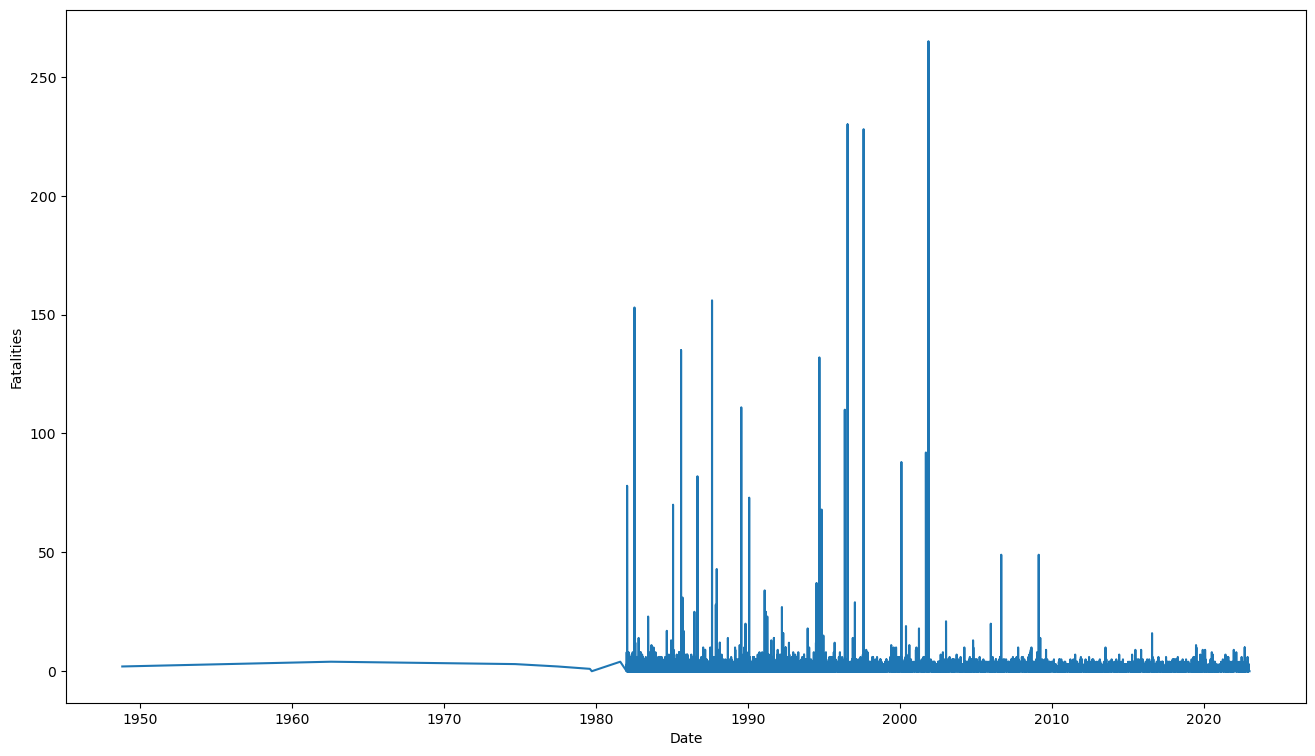

In [46]:
#Fatal Injuries by Year
fig,ax=plt.subplots(figsize=(16,9))
ax.plot(df['Date'], df['Fatal_Injuries'])
ax.set_xlabel('Date')
ax.set_ylabel('Fatalities')

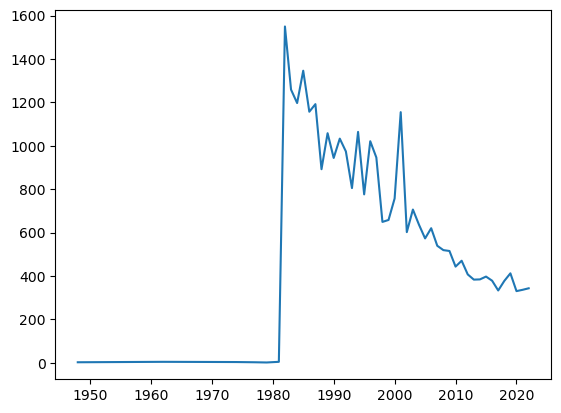

In [47]:
df_year=df.groupby(df['Date'].dt.year)['Fatal_Injuries'].sum()
df_year.head()

plt.plot(df_year)

In [48]:
df_year.head(50)

Date
1948       2.0
1962       4.0
1974       3.0
1977       2.0
1979       1.0
1981       4.0
1982    1550.0
1983    1259.0
1984    1197.0
1985    1346.0
1986    1157.0
1987    1192.0
1988     892.0
1989    1058.0
1990     944.0
1991    1033.0
1992     974.0
1993     805.0
1994    1064.0
1995     776.0
1996    1021.0
1997     946.0
1998     649.0
1999     658.0
2000     757.0
2001    1155.0
2002     602.0
2003     706.0
2004     636.0
2005     573.0
2006     620.0
2007     539.0
2008     519.0
2009     515.0
2010     443.0
2011     470.0
2012     407.0
2013     383.0
2014     384.0
2015     397.0
2016     378.0
2017     333.0
2018     377.0
2019     412.0
2020     330.0
2021     336.0
2022     343.0
Name: Fatal_Injuries, dtype: float64

Since there is a steep drop off between 2001 and 2002 and technology has improved in the 21st century, we will only include data from 2002 onward in our analysis

In [49]:
#Limited dataset to only be 2002 onward
df_subset=df[(df['Date'].dt.year>=2002) & (df['Amateur_Built']=='No')]
df_subset.Engines

51958    0.0
51959    2.0
51960    2.0
51961    2.0
51962    3.0
        ... 
88884    1.0
88885    1.0
88886    1.0
88887    1.0
88888    1.0
Name: Engines, Length: 27726, dtype: float64

In [50]:
df.Category.value_counts()

Category
Airplane             24201
Helicopter            2719
Glider                 503
Balloon                229
Gyrocraft              172
Weight-Shift           161
Powered Parachute       90
Ultralight              25
WSFT                     9
Blimp                    4
Powered-Lift             3
Rocket                   1
ULTR                     1
Name: count, dtype: int64

In [51]:
#Limit dataset to airplanes
df_subset=df_subset[(df_subset['Category']=='Airplane')]
df_subset.Category.value_counts()

Category
Airplane    17979
Name: count, dtype: int64

## Exploring Engines

In [52]:
df_subset.Engines.value_counts().values

array([15589,  2327,    38,    20,     3,     1,     1], dtype=int64)

Text(0, 0.5, 'Number of Investigations')

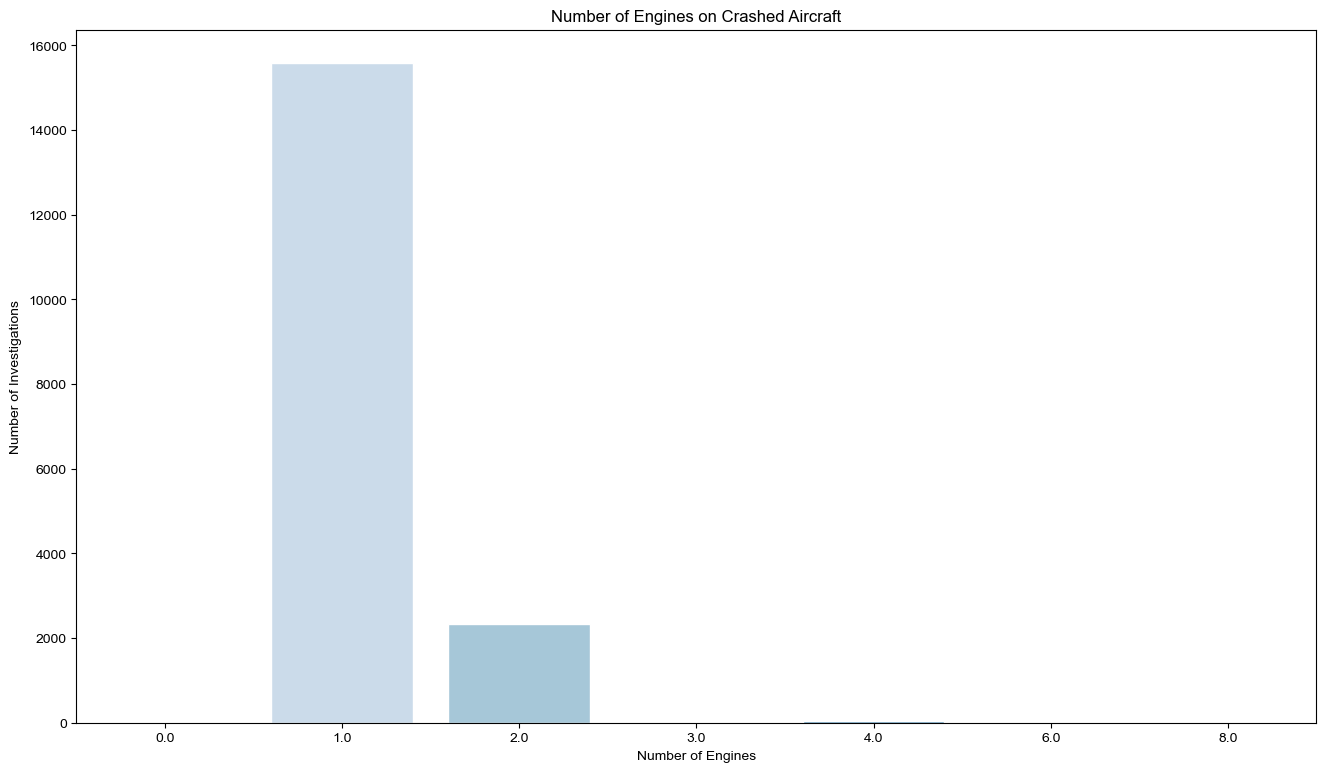

In [53]:
fig, ax = plt.subplots(figsize=(16,9))
sns.set_style('white')
engines=sns.barplot(x=df_subset['Engines'].value_counts().index, y=df_subset['Engines'].value_counts().values,data=df_subset, palette='Blues')
engines.set_title('Number of Engines on Crashed Aircraft')
engines.set_xlabel('Number of Engines')
engines.set_ylabel('Number of Investigations')

It makes sense that the most aircraft involved in incidents in our dataset only had one engine. That means there is no other engine to rely on if one fails and there is less time for an emergency landing.

In [54]:
#Exploring Engine Types
df_subset['Engine_Type'].value_counts()

Engine_Type
Reciprocating    14452
Turbo Prop        1101
Turbo Fan          636
Turbo Jet          115
Turbo Shaft         10
Electric             5
Name: count, dtype: int64

Text(0, 0.5, 'Number of Investigations')

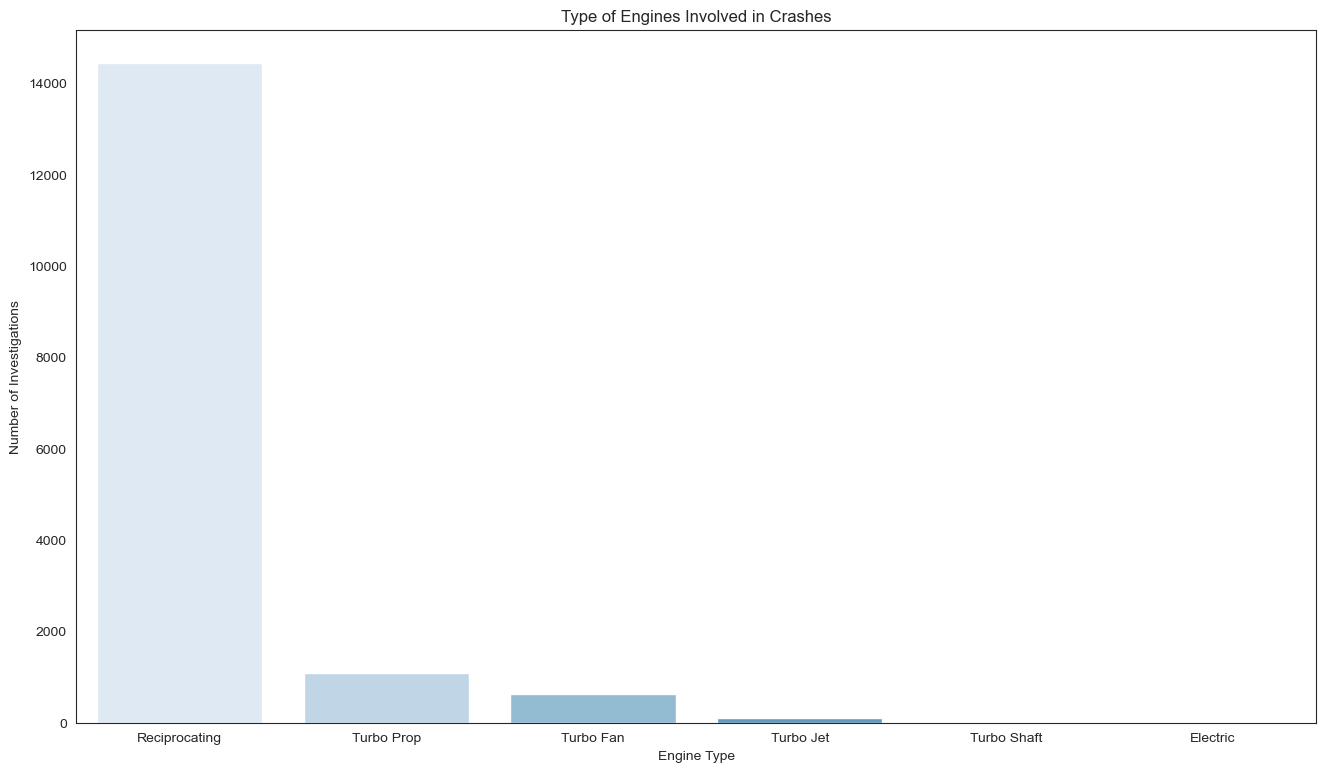

In [55]:
#Plotting Engine Types
fig, ax = plt.subplots(figsize=(16,9))
sns.set_style('white')
engines=sns.barplot(x=df_subset['Engine_Type'].value_counts().index, y=df_subset['Engine_Type'].value_counts().values,data=df_subset, palette='Blues')
engines.set_title('Type of Engines Involved in Crashes')
engines.set_xlabel('Engine Type')
engines.set_ylabel('Number of Investigations')

Looks like Reciprocating Engines are involved in the most crashes. Let's filter aircraft with zero and one engine out of the dataset and see if this result changes.

In [56]:
df_subset=df_subset[df_subset['Engines']>=2]
df_subset.Engines.value_counts

<bound method IndexOpsMixin.value_counts of 51981    2.0
52049    2.0
52361    2.0
52813    2.0
53002    2.0
        ... 
88834    2.0
88836    2.0
88858    2.0
88869    2.0
88876    2.0
Name: Engines, Length: 2387, dtype: float64>

Text(0, 0.5, 'Number of Investigations')

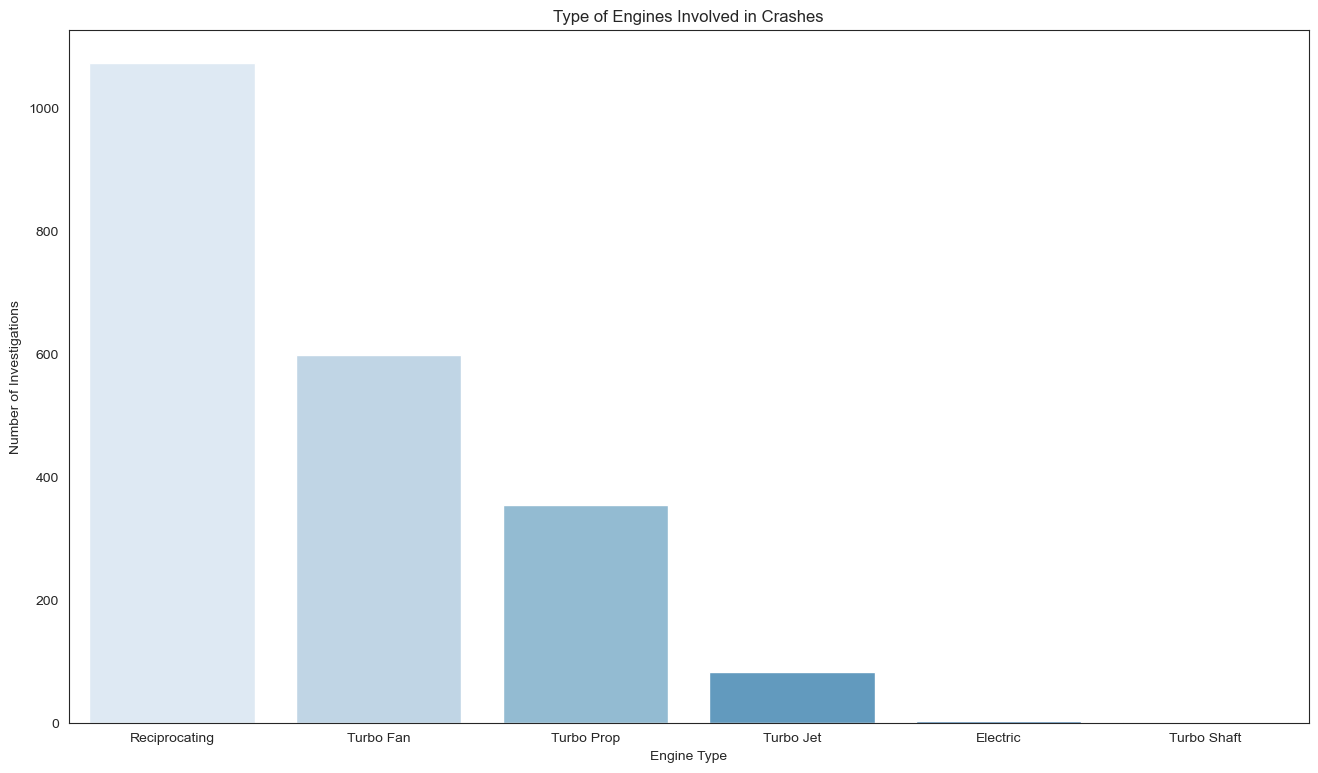

In [57]:
fig, ax = plt.subplots(figsize=(16,9))
sns.set_style('white')
engines=sns.barplot(x=df_subset['Engine_Type'].value_counts().index, y=df_subset['Engine_Type'].value_counts().values,data=df_subset, palette='Blues')
engines.set_title('Type of Engines Involved in Crashes')
engines.set_xlabel('Engine Type')
engines.set_ylabel('Number of Investigations')

Reciprocating still seems to be involved in the most crashes, but there is not as a drastic of a difference between Reciprocating and Turbo Fan now. Although it still seems that reciprocating engines are involved in the most accidents, so let's filter them out.

In [58]:
df_subset=df_subset[df_subset['Engine_Type']!='Reciprocating']
df_subset.Engine_Type.value_counts()

Engine_Type
Turbo Fan      600
Turbo Prop     355
Turbo Jet       84
Electric         3
Turbo Shaft      2
Name: count, dtype: int64

In [111]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1498 entries, 5 to 88876
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                1498 non-null   object        
 1   Type              1498 non-null   object        
 2   Accident_Number   1498 non-null   object        
 3   Date              1498 non-null   datetime64[ns]
 4   Country           1498 non-null   object        
 5   Injury_Severity   1450 non-null   object        
 6   Damage            1150 non-null   object        
 7   Category          1498 non-null   object        
 8   Make              1498 non-null   object        
 9   Model             1498 non-null   object        
 10  Amateur_Built     1498 non-null   object        
 11  Engines           1498 non-null   float64       
 12  Engine_Type       1226 non-null   object        
 13  Fatal_Injuries    1498 non-null   float64       
 14  Serious_Injuries  1498 non-n

Text(0, 0.5, 'Number of Investigations')

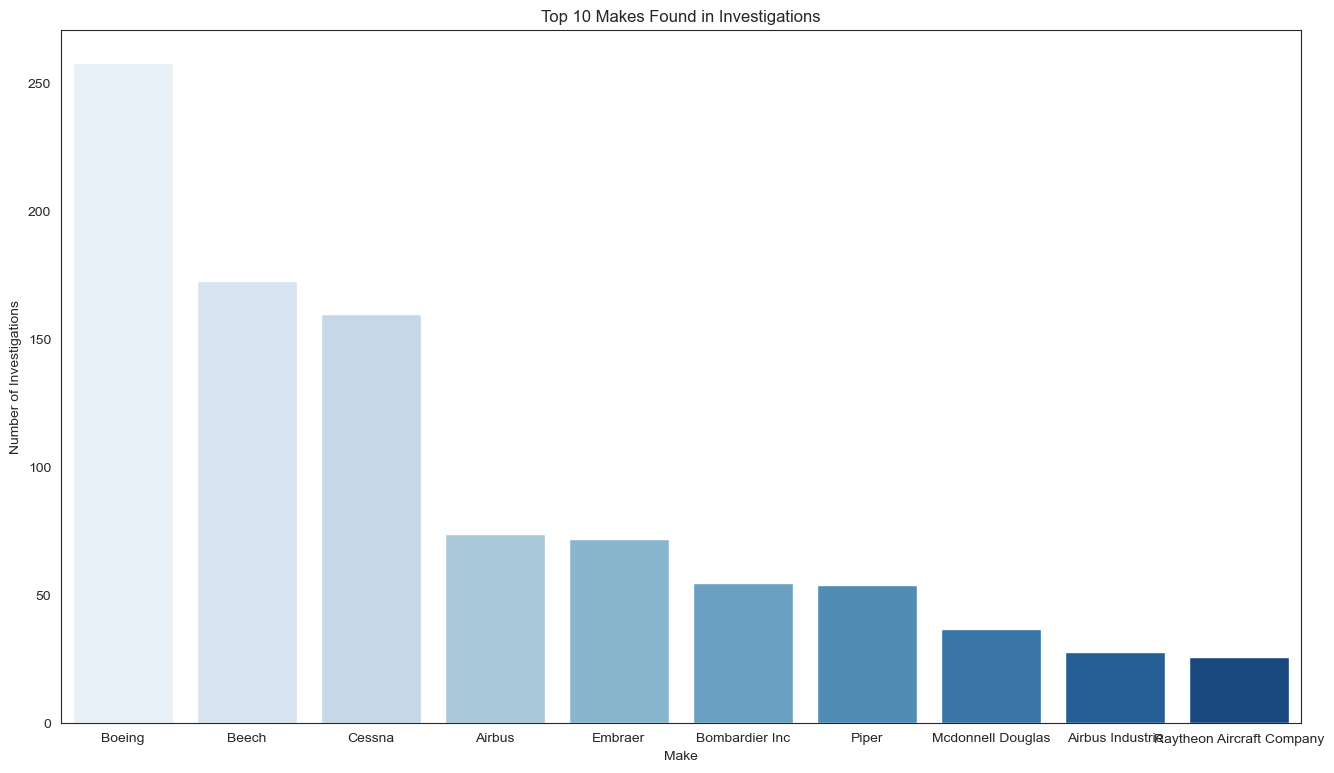

In [59]:
#Showing Top Makes Involved in Accidents
fig, ax = plt.subplots(figsize=(16,9))
sns.set_style('white')
df_make=sns.barplot(data=df_subset, x=df_subset.Make.value_counts().index[:10], y=df_subset.Make.value_counts().values[:10], palette='Blues')
df_make.set_title('Top 10 Makes Found in Investigations')
df_make.set_xlabel('Make')
df_make.set_xtic
df_make.set_ylabel('Number of Investigations')

In [61]:
df_subset.Injury_Severity.values

array(['Non-Fatal', 'Non-Fatal', 'Non-Fatal', ..., 'Minor', 'Non-Fatal',
       'Non-Fatal'], dtype=object)

In [62]:
df_subset_fatal=df_subset[df_subset['Injury_Severity']=='Fatal']
df_subset_fatal.shape

(171, 25)

Text(0, 0.5, 'Number of Fatal Investigations')

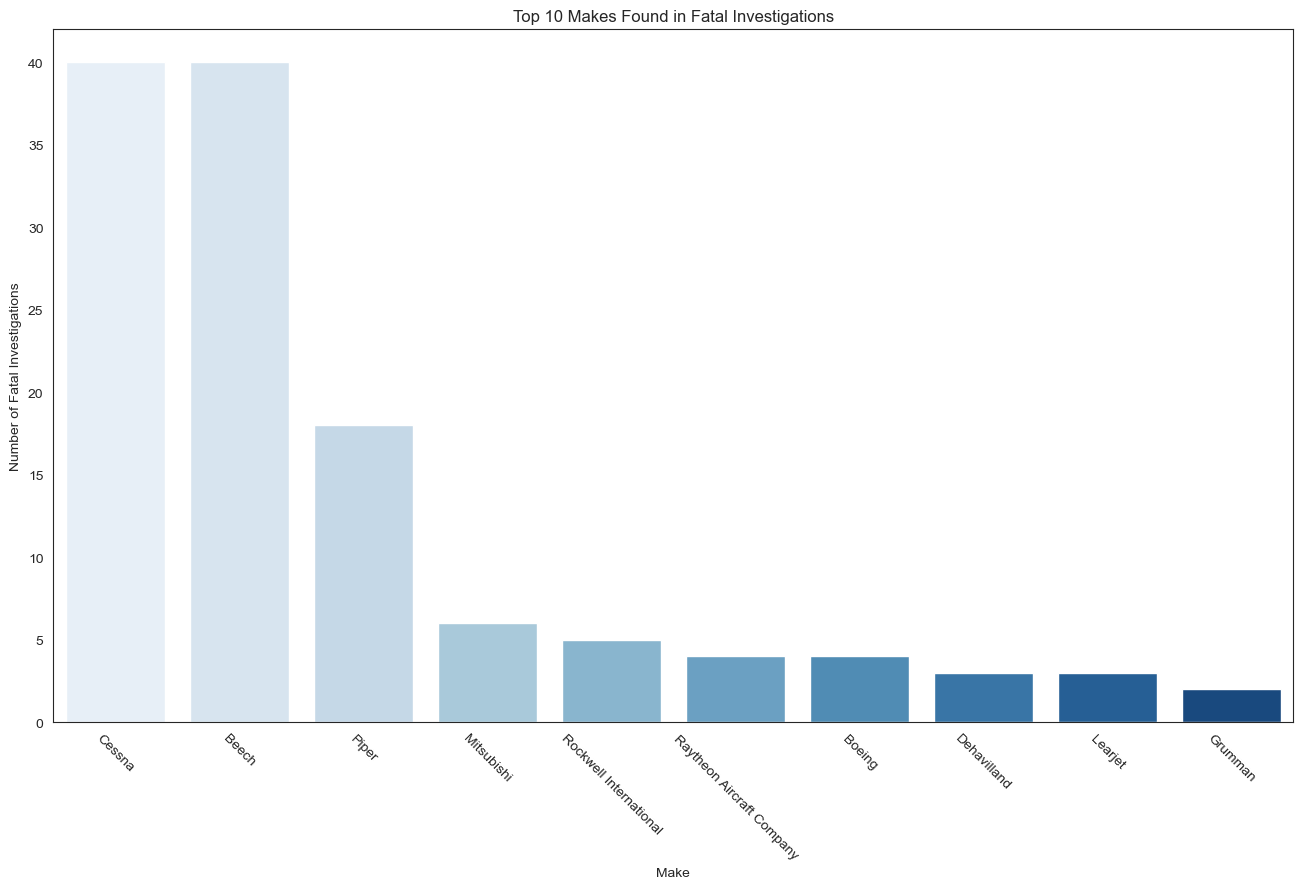

In [77]:
#Showing Top Makes Involved in Accidents
fig, ax = plt.subplots(figsize=(16,9))
sns.set_style('white')
df_make=sns.barplot(data=df_subset_fatal, x=df_subset_fatal.Make.value_counts().index[:10], y=df_subset_fatal.Make.value_counts().values[:10],palette='Blues')
df_make.set_title('Top 10 Makes Found in Fatal Investigations')
df_make.set_xlabel('Make')
df_make.set_xticklabels(df_subset_fatal.Make.value_counts().index[:10],rotation=-45)
df_make.set_ylabel('Number of Fatal Investigations')

In [ ]:
df_subset=df

# Conclusions

## Limitations

## Recommendations

## Next Steps